<a href="https://colab.research.google.com/github/chipojaya1/pro_bono_dd/blob/main/Efficiency_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consulting360 Pro Bono Project -
### Team Capacity vs. Revenue Efficiency Report

## Analysis Framework:
1. **Capacity & Utilization Analysis**
2. **Revenue per Employee Metrics**
3. **Growth Trends Analysis**
4. **Employee Engagement Analysis**



##**Setting up Environment and Loading the Data**

In [1]:
# Read data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load libraries for simple data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')  # Set visual style for seaborn images

import warnings
warnings.simplefilter("ignore")

In [3]:
# Load the data
file_path = '/content/drive/MyDrive/DDev/Revenue Data.xlsx'

In [4]:
# Creating dataframes
all = pd.read_excel(file_path, sheet_name='Data')
financial = pd.read_excel(file_path, sheet_name='Core Financial Metrics')
team = pd.read_excel(file_path, sheet_name='Team Capacity Metrics')
projects = pd.read_excel(file_path, sheet_name='Project or Retainer Perfomance')
hiring = pd.read_excel(file_path, sheet_name='Hiring Attrition Metrics')

##**Data exploration**


**Reasoning**:
Explore the data by examining its shape, data types, key variables, missing values, and summary statistics.



In [5]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                6 non-null      int64  
 1   # Months                            6 non-null      int64  
 2   Retainer Income                     6 non-null      int64  
 3   Project Income                      6 non-null      int64  
 4   Other Income                        6 non-null      int64  
 5   Retainer Income %                   6 non-null      float64
 6   Project Income %                    6 non-null      float64
 7   Other Income %                      6 non-null      float64
 8   Retainer MRR Actual                 6 non-null      float64
 9   Project MRR Actual                  6 non-null      float64
 10  Total Annual Income                 6 non-null      int64  
 11  MRR                                 6 non-null   

In [6]:
# Convert Year to string
all['Year'] = all['Year'].astype(str)
years = all['Year'].tolist()

In [7]:
# Display the first few rows of the data
print(all.head())

# Rename columns for easier reference (optional)
all.columns = [col.strip().replace(' ', '_') for col in all.columns]

# Check for missing values
print(all.isnull().sum())

   Year  # Months  Retainer Income  Project Income  Other Income  \
0  2019        12          1382595          553157        394428   
1  2020        12          1385650          474977        150150   
2  2021        12          1869050          967379        228739   
3  2022        12          2420320          811305        299179   
4  2023        12          2989326          964927        407376   

   Retainer Income %  Project Income %  Other Income %  Retainer MRR Actual  \
0           0.593343          0.237388        0.169269        115216.250000   
1           0.689112          0.236216        0.074673        115470.833333   
2           0.609771          0.315604        0.074625        155754.166667   
3           0.685487          0.229779        0.084734        201693.333333   
4           0.685369          0.221231        0.093400        249110.500000   

   Project MRR Actual  ...  # Retainers Landed  # Retainers Lost  \
0        46096.416667  ...                 NaN  

In [8]:
all.head()

,Year,#_Months,Retainer_Income,Project_Income,Other_Income,Retainer_Income_%,Project_Income_%,Other_Income_%,Retainer_MRR_Actual,Project_MRR_Actual,...,#_Retainers_Landed,#_Retainers_Lost,Net_Retainer_Growth,Avg_MRR_for_Newly_Landed_Retainers,Retainer_Proposals_Sent,Retainer_Win_Rate,Retainer_MRR_@_Year_End,Project_MRR_Contracted_@_Year_End,Monthly_Expenses,Monthly_Net
0,2019,12,1382595,553157,394428,0.593343,0.237388,0.169269,115216.250000,46096.416667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,12,1385650,474977,150150,0.689112,0.236216,0.074673,115470.833333,39581.416667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,12,1869050,967379,228739,0.609771,0.315604,0.074625,155754.166667,80614.916667,...,NaN,NaN,NaN,NaN,NaN,NaN,165000.0,77000.0,241884.416667,115.583333
3,2022,12,2420320,811305,299179,0.685487,0.229779,0.084734,201693.333333,67608.750000,...,8.0,5.0,3.0,9200.0,14.0,0.571429,215000.0,62000.0,304930.500000,-27930.500000
4,2023,12,2989326,964927,407376,0.685369,0.221231,0.093400,249110.500000,80410.583333,...,7.0,4.0,3.0,9832.0,18.0,0.388889,266631.0,78757.0,343427.750000,1960.250000


In [9]:
print(all.columns)

Index(['Year', '#_Months', 'Retainer_Income', 'Project_Income', 'Other_Income',
       'Retainer_Income_%', 'Project_Income_%', 'Other_Income_%',
       'Retainer_MRR_Actual', 'Project_MRR_Actual', 'Total_Annual_Income',
       'MRR', 'MRR_YoY_Delta', 'Total_Annual_Expenses', 'MRE', 'MRE_YoY_Delta',
       'Net_Income', 'Profit_Margin_%', 'Avg_Cost_per_Logged_Hour',
       'Avg_Cost_per_Logged_Billable_Hour', 'Total_Logged_Hours',
       'Total_Logged_Billable_Hours', '%_Nonbillable_Hours',
       'Net_%_Billable_Hours_out_of_Logged', 'All_Team_Utilized_Time_%',
       'All_Team_Billable_Time_%', '#_Employees_@_Year_End',
       'Avg_#_Monthly_FTEs_(32+_hrs)', 'YoY_Delta',
       'Avg_#_Monthly_PTEs_(10-31_hrs)', 'Rev_per_Employee',
       'Avg_Wage_per_Employee_@_Year_End', '#_New_Hires', 'Employee_Attrition',
       'Avg_Rev_per_Project', 'Total_#_Projects_Landed', '#_New_Projects',
       '#_Existing_Projects', 'New_Project_%', 'Project_Renewal_%',
       'Project_Proposals_Sent', '

##**Data visualization**



##**Revenue Efficiency Analysis**


**Revenue Per Employee Trend**

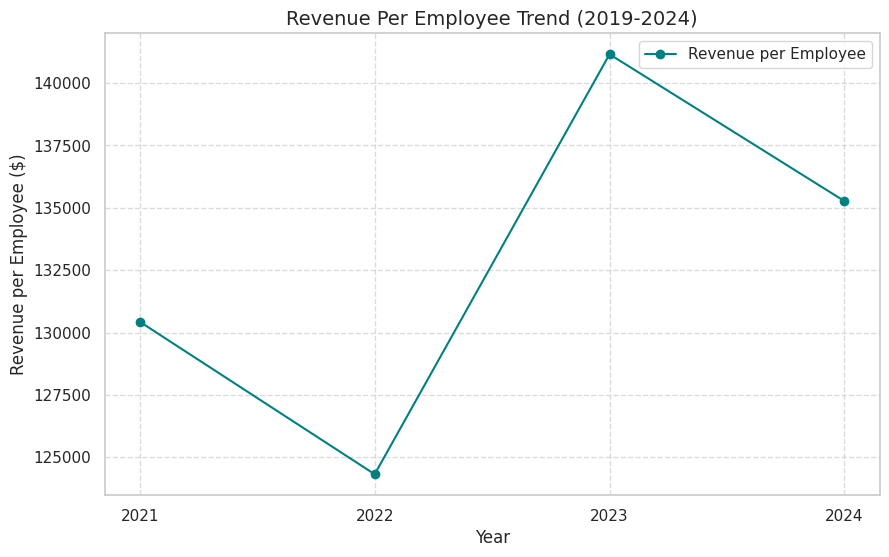

In [10]:
# Filter relevant columns
years = all['Year']
revenue_per_employee = all['Rev_per_Employee']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(years, revenue_per_employee, marker='o', color='teal', label='Revenue per Employee')
plt.title('Revenue Per Employee Trend (2019-2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Revenue per Employee ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**YoY Revenue Growth**

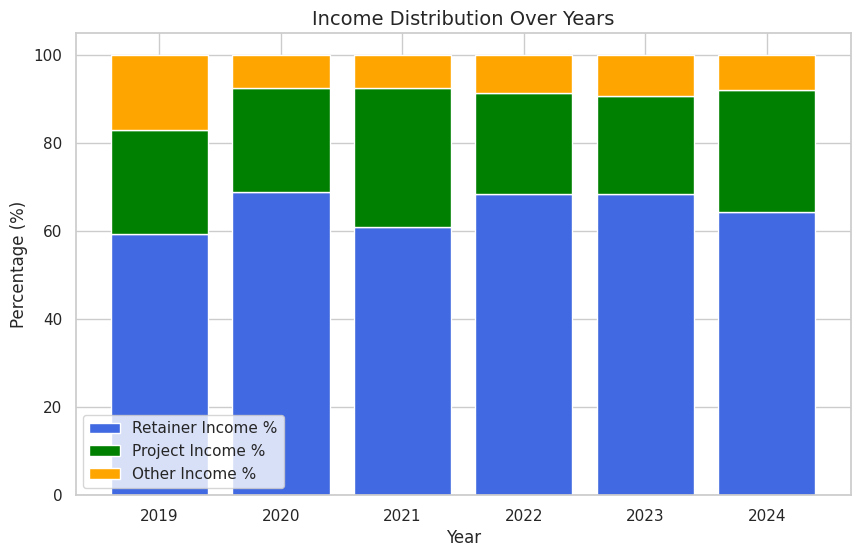

In [11]:
# Adjust Income Percentage Columns by converting decimal values to percentages
all['Retainer_Income_%'] *= 100
all['Project_Income_%'] *= 100
all['Other_Income_%'] *= 100

# Prepare data
years = all['Year']
retainer_income_pct = all['Retainer_Income_%']
project_income_pct = all['Project_Income_%']
other_income_pct = all['Other_Income_%']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, retainer_income_pct, label='Retainer Income %', color='royalblue')
plt.bar(years, project_income_pct, bottom=retainer_income_pct, label='Project Income %', color='green')
plt.bar(years, other_income_pct, bottom=retainer_income_pct+project_income_pct, label='Other Income %', color='orange')
plt.title('Income Distribution Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

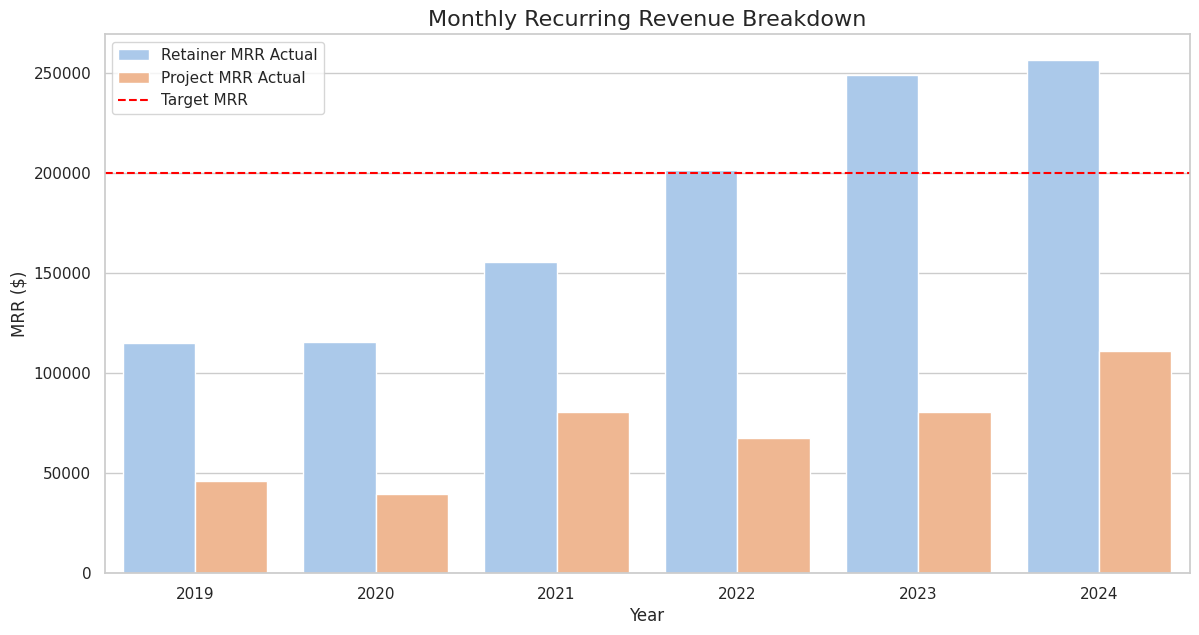

In [12]:
# Step 4: MRR Analysis
plt.figure(figsize=(14,7))
mrr = financial.melt(id_vars='Year',
                    value_vars=['Retainer MRR Actual', 'Project MRR Actual'],
                    var_name='Type',
                    value_name='MRR')

sns.barplot(data=mrr, x='Year', y='MRR', hue='Type')
plt.title('Monthly Recurring Revenue Breakdown', fontsize=16)
plt.ylabel('MRR ($)')
plt.axhline(y=200000, color='red', linestyle='--', label='Target MRR')
plt.legend()
plt.show()

##**Team Utilization Metrics**

**Total Logged Hours (Billable vs Nonbillable)**

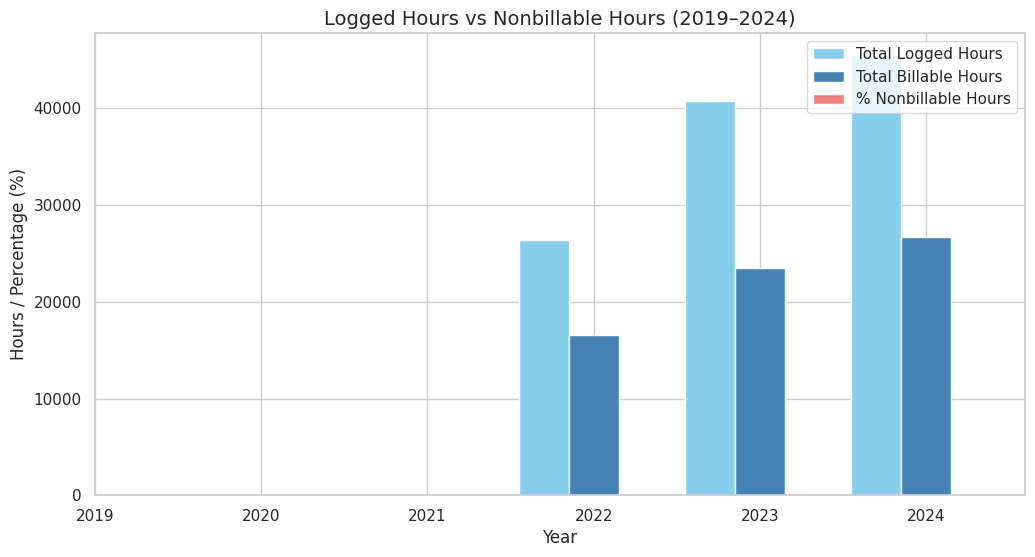

In [13]:
# Prepare data
logged_hours = all['Total_Logged_Hours']
billable_hours = all['Total_Logged_Billable_Hours']
nonbillable_pct = all['%_Nonbillable_Hours'] * 100  # Convert to percentage

# Plot bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.3
x = np.arange(len(all['Year']))

plt.bar(x - bar_width, logged_hours, width=bar_width, label='Total Logged Hours', color='skyblue')
plt.bar(x, billable_hours, width=bar_width, label='Total Billable Hours', color='steelblue')
plt.bar(x + bar_width, nonbillable_pct, width=bar_width, label='% Nonbillable Hours', color='lightcoral')

plt.xticks(x, all['Year'])
plt.title('Logged Hours vs Nonbillable Hours (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Hours / Percentage (%)')
plt.legend()
plt.show()


**Dual-axis Line Graph: Utilized vs Billable Time %**

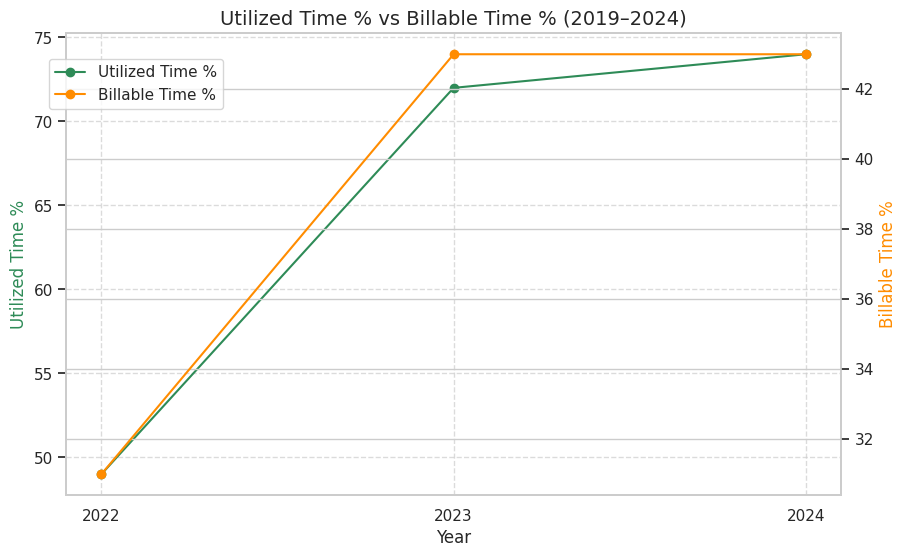

In [14]:
# Prepare data
utilized_time_pct = all['All_Team_Utilized_Time_%'] * 100
billable_time_pct = all['All_Team_Billable_Time_%'] * 100

# Plot line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(all['Year'], utilized_time_pct, marker='o', color='seagreen', label='Utilized Time %')
ax1.set_ylabel('Utilized Time %', color='seagreen')
ax1.set_xlabel('Year')
ax1.set_title('Utilized Time % vs Billable Time % (2019–2024)', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(all['Year'], billable_time_pct, marker='o', color='darkorange', label='Billable Time %')
ax2.set_ylabel('Billable Time %', color='darkorange')

ax1.grid(True, linestyle='--', alpha=0.7)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.85))
plt.show()

**Average Cost per Logged Billable Hour Trend**

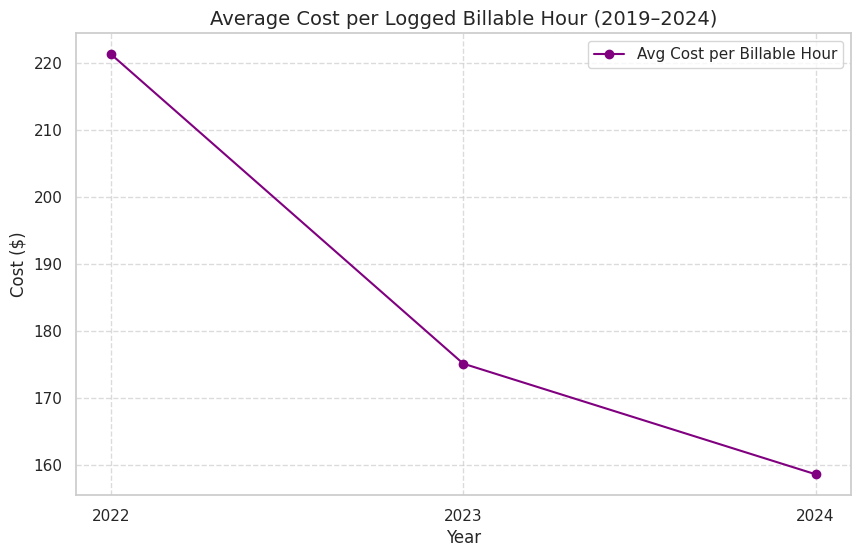

In [15]:
# Prepare data
cost_per_billable_hour = all['Avg_Cost_per_Logged_Billable_Hour']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(all['Year'], cost_per_billable_hour, marker='o', color='purple', label='Avg Cost per Billable Hour')
plt.title('Average Cost per Logged Billable Hour (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Cost ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Logged vs Non billlable Hours**

##**Profitability**

**Profit Margin Trend**

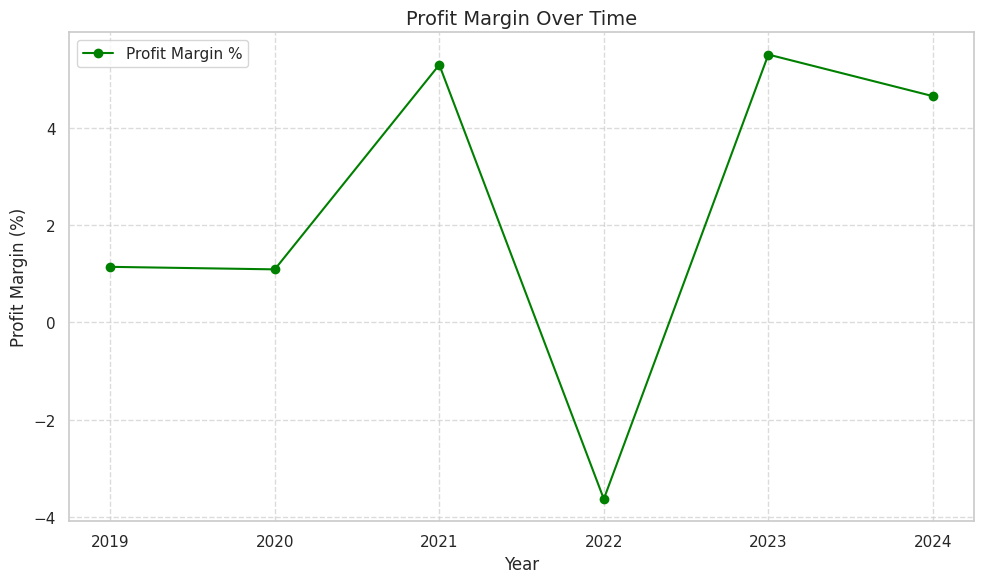

In [32]:
# Prepare data
years = all['Year']
profit_margin = all['Profit_Margin_%'] * 100  # Convert to percentage if necessary

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(years, profit_margin, marker='o', color='green', label='Profit Margin %')
plt.title('Profit Margin Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Profit Margin (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Net Income Trends**

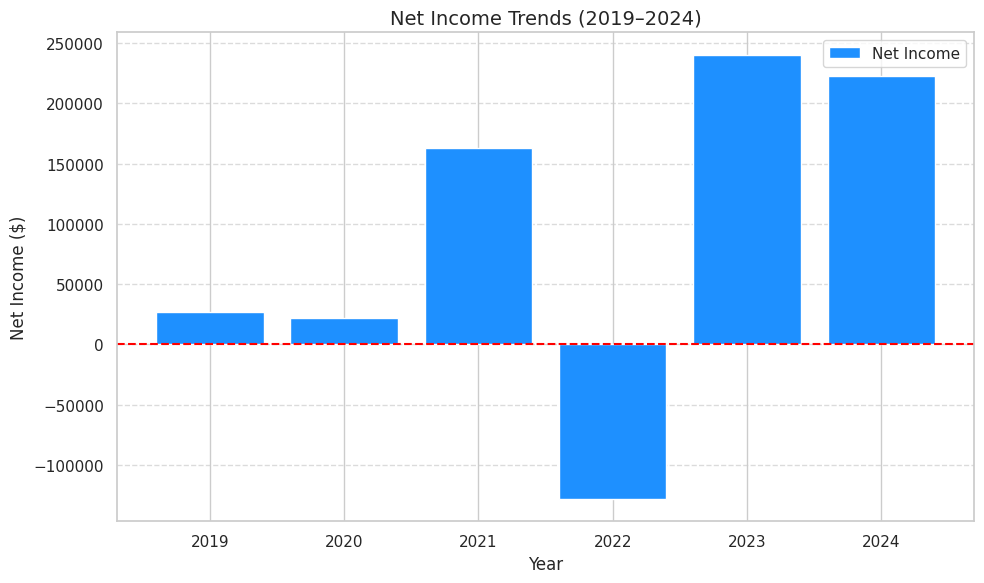

In [17]:
# Prepare data
net_income = all['Net_Income']

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, net_income, color='dodgerblue', label='Net Income')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.title('Net Income Trends (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Net Income ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Income vs Expenses**

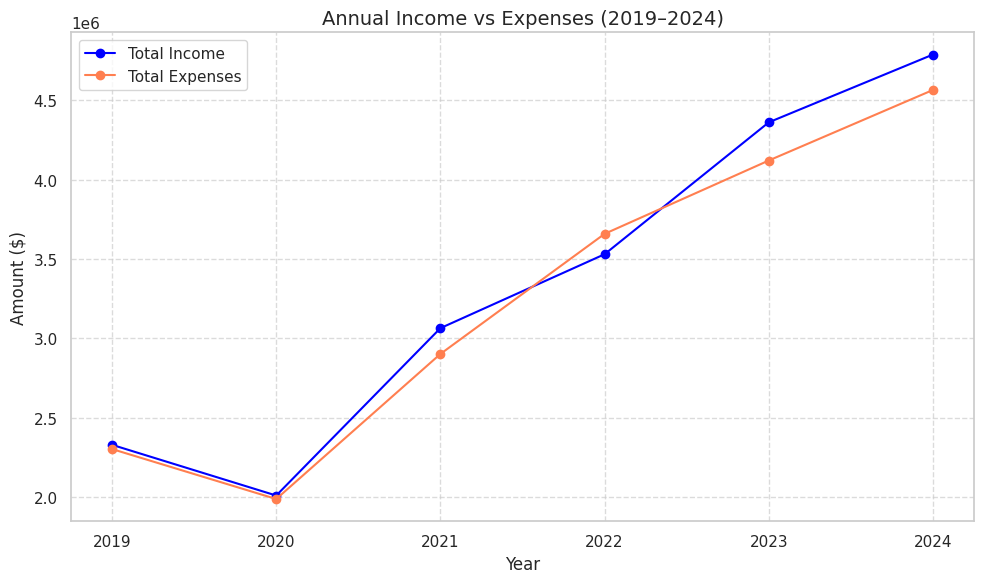

In [18]:
# Prepare data
total_income = all['Total_Annual_Income']
total_expenses = all['Total_Annual_Expenses']

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(years, total_income, marker='o', color='blue', label='Total Income')
plt.plot(years, total_expenses, marker='o', color='coral', label='Total Expenses')
plt.title('Annual Income vs Expenses (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

##**Hiring and Retention**

**Not enough info**

##**Project & Retainer Performance**

**Average Revenue Per Project**

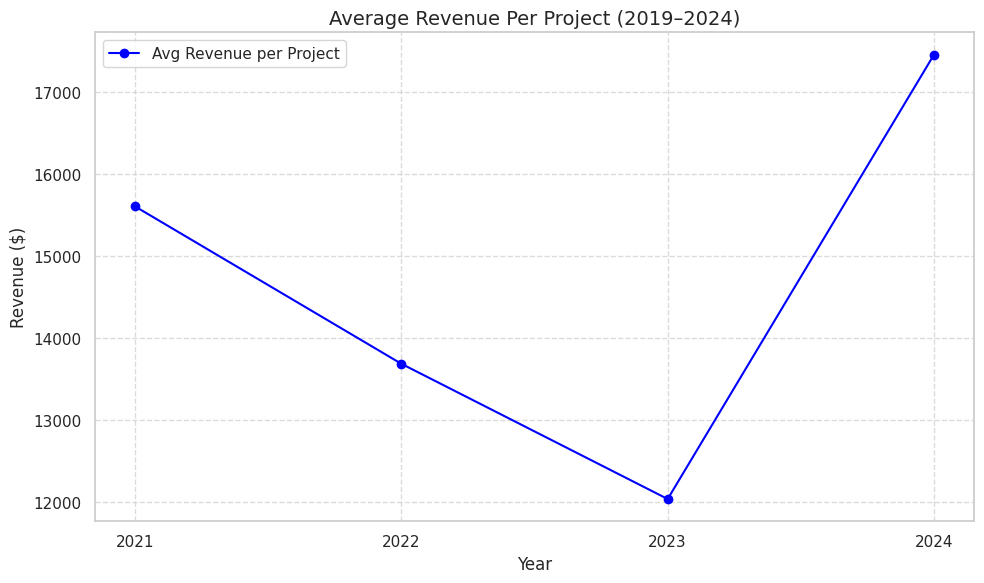

In [19]:
# Prepare data
years = all['Year']
avg_rev_per_project = all['Avg_Rev_per_Project']

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(years, avg_rev_per_project, marker='o', color='blue', label='Avg Revenue per Project')
plt.title('Average Revenue Per Project (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Project Win Rate**

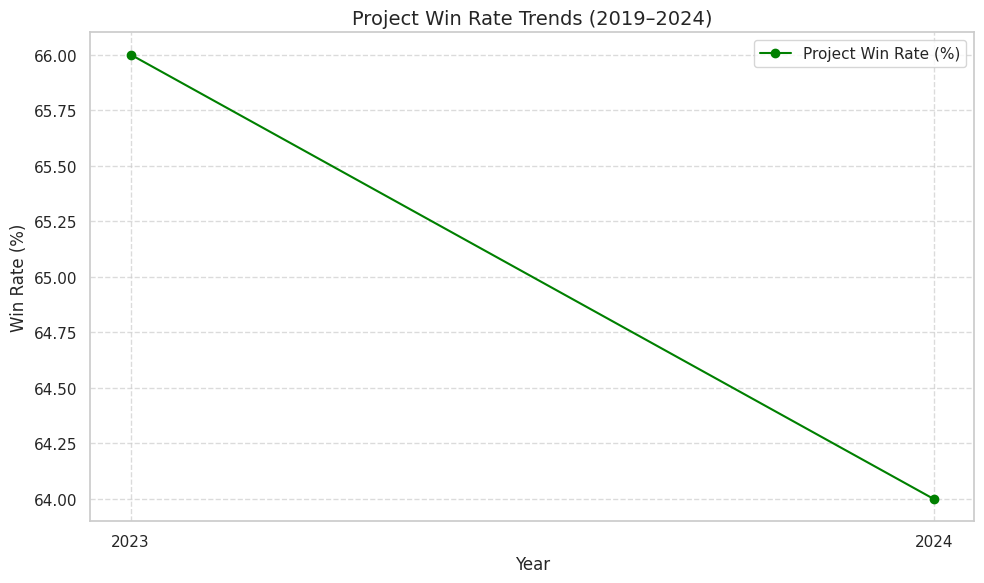

In [20]:
# Prepare data
project_win_rate = all['Project_Win_Rate'] * 100  # Convert to percentage

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(years, project_win_rate, marker='o', color='green', label='Project Win Rate (%)')
plt.title('Project Win Rate Trends (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Win Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Net Retainer Growth**

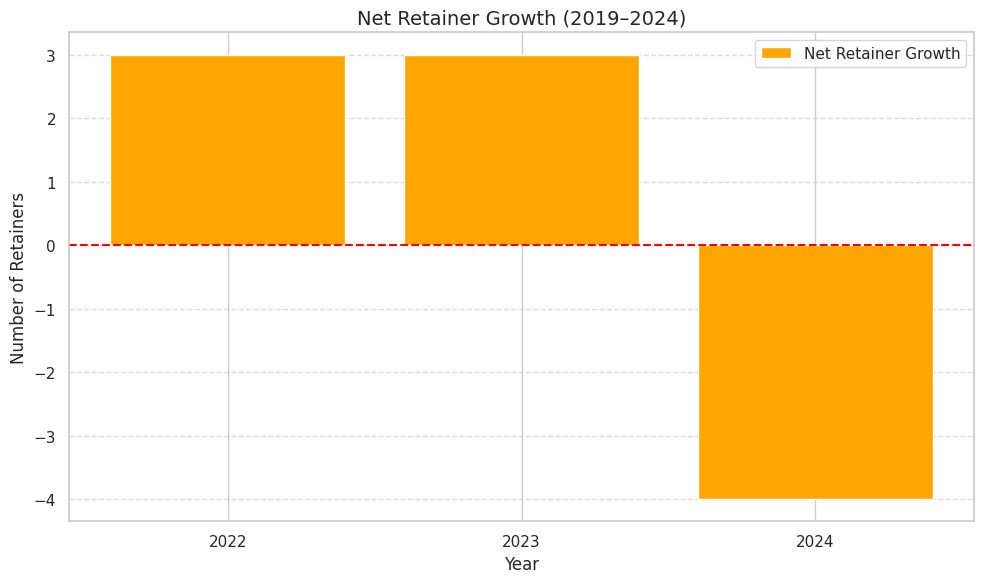

In [21]:
# Prepare data
net_retainer_growth = all['Net_Retainer_Growth']

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, net_retainer_growth, color='orange', label='Net Retainer Growth')
plt.axhline(0, color='red', linestyle='--')  # Add horizontal line at zero
plt.title('Net Retainer Growth (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Retainers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

##**Strategic Insights**

In [22]:
# Step 8: Strategic Insights
print("\nKey Insights:")


# Step 9: Forecast Requirements
print("\nForecast Requirements:")



Key Insights:

Forecast Requirements:


##**Using ipywidgets to interactively calculate the required FTEs**

from ipywidgets import interact

# Define current revenue per hour (example calculation, adjust as needed)
current_rev_per_hour = all['Total_Annual_Income'].iloc[-1] / all['Total_Logged_Billable_Hours'].iloc[-1]

# Interactive function for FTE calculation
@interact(target_revenue=(6000000, 10000000, 500000))
def calculate_hiring(target_revenue=8000000):
    required_hours = target_revenue / current_rev_per_hour
    additional_fte = (required_hours - all['Total_Logged_Billable_Hours'].iloc[-1]) / 160  # Assuming 160 hours per FTE
    print(f"Required FTEs: {additional_fte:.1f}")

In [40]:
# paste code above here

##**To optimize workforce allocation**

In [37]:
from scipy.optimize import minimize

# Define the objective function
# Example: Maximize Revenue per Employee
def objective(x):
    # x[0] = FTEs, x[1] = Total Billable Hours
    ftes = x[0]
    billable_hours = x[1]
    revenue_per_employee = billable_hours / ftes
    return -revenue_per_employee  # Negative because we want to maximize

# Define constraints
def constraint1(x):
    # Total billable hours constraint (based on logged data)
    return x[1] - 160 * x[0]  # Example: 160 hours per FTE per month

# Define bounds and initial guess
bounds = [(20, 50), (20000, 50000)]  # FTEs and billable hours range
initial_guess = [30, 25000]

# Solve the optimization problem
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints={'type': 'eq', 'fun': constraint1})

# Output results
optimal_ftes = result.x[0]
optimal_billable_hours = result.x[1]
print(f"Optimal FTEs: {optimal_ftes:.1f}")
print(f"Optimal Billable Hours: {optimal_billable_hours:.1f}")

Optimal FTEs: 50.0
Optimal Billable Hours: 20000.0


In [38]:
from scipy.optimize import minimize

# Define constants and initial data
current_logged_hours = 45493  # Total logged hours from the latest year (2024)
current_billable_hours = 26652  # Total billable hours
current_avg_cost_per_logged_hour = 158.62  # From the data
target_revenue = 8000000  # Set your target revenue

# Define the objective function to maximize profit margin
def objective(x):
    # x[0] = Total Billable Hours, x[1] = Total Logged Hours, x[2] = FTEs
    billable_hours = x[0]
    logged_hours = x[1]
    ftes = x[2]

    # Calculate revenue
    revenue = billable_hours * (target_revenue / current_billable_hours)

    # Calculate costs
    total_cost = logged_hours * current_avg_cost_per_logged_hour

    # Profit margin calculation
    profit_margin = (revenue - total_cost) / revenue
    return -profit_margin  # Negative to maximize

# Define constraints
def constraint1(x):
    # Total billable hours must not exceed logged hours
    return x[1] - x[0]

def constraint2(x):
    # Logged hours must be proportional to FTEs (assuming 160 hours/month per FTE)
    return x[1] - (160 * x[2] * 12)

# Define bounds and initial guesses
bounds = [(20000, 50000),  # Bounds for billable hours
          (30000, 60000),  # Bounds for logged hours
          (20, 50)]        # Bounds for FTEs
initial_guess = [26652, 45493, 35]

# Solve the optimization problem
constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2}]
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal values
optimal_billable_hours = result.x[0]
optimal_logged_hours = result.x[1]
optimal_ftes = result.x[2]
print(f"Optimal Billable Hours: {optimal_billable_hours:.2f}")
print(f"Optimal Logged Hours: {optimal_logged_hours:.2f}")
print(f"Optimal FTEs: {optimal_ftes:.1f}")
print(f"Maximized Profit Margin: {-result.fun:.4f}")

Optimal Billable Hours: 26652.00
Optimal Logged Hours: 45493.01
Optimal FTEs: 23.7
Maximized Profit Margin: 0.0980
